## 1 Hubble's Law

    (a)

The measured Hubble constant is [ 401.74677688] with an error of +/- 437.163215504


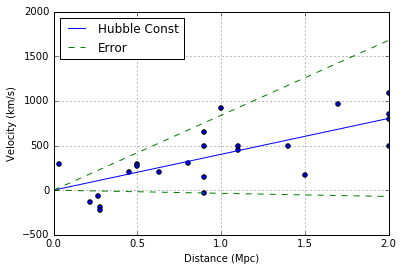

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

with open("hubble1.dat") as textfile:
    lines = [line.split() for line in textfile]
    
distance = []
velocity = []

for i in range (0,len(lines)):
    distance.append(float(lines[i][0]))
    velocity.append(float(lines[i][1]))

xp = np.linspace(0,2,10)

def func(x, a):
    return a*x

m, b = curve_fit(func, distance, velocity)

div = []
for i in range(len(velocity)):
    if i == 1:
        a = 0
    else:
        a = velocity[i]/(distance[i])
        div.append(float(a))
    
sigma1 = np.std(div)

p1 = plt.plot(xp, m*xp, label = 'Hubble Const')
p2 = plt.plot(xp, (m+sigma1)*xp, '--', label = 'Error')
plt.plot(xp, (m-sigma1)*xp, 'g--')
plt.grid(True)
    
plt.scatter(distance, velocity)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.xlim(0,2)
plt.legend(loc = 'upper left')
print 'The measured Hubble constant is', m, 'with an error of +/-', sigma1

The measured Hubble constant is [ 67.23871586] with an error of +/- 18.6830637796


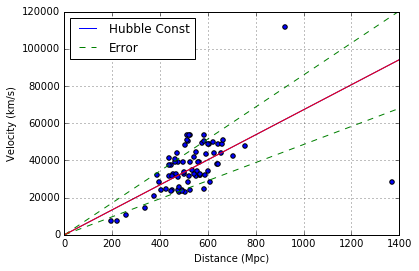

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

with open("hubble2.dat") as textfile:
    lines = [line.split() for line in textfile]

distance2 = []
velocity2 = []

for i in range (0,len(lines)):
    distance2.append(float(lines[i][0]))
    velocity2.append(float(lines[i][1]))

xp = np.linspace(0,1400,100)

def func(x, a):
    return a*x

m, b = curve_fit(func, distance2, velocity2)

div = []
for i in range(len(velocity2)):
    a = velocity2[i]/(distance2[i])
    div.append(float(a))
    
sigma2 = np.std(div)

plt.plot(xp, m*xp, label = 'Hubble Const')
plt.plot(xp, (m+sigma2)*xp, '--', label = 'Error')
plt.plot(xp, (m-sigma2)*xp, 'g--')
plt.grid(True)

plt.plot(xp, m*xp)
plt.grid(True)
    
plt.scatter(distance2, velocity2)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.ylim(0,120000)
plt.xlim(0,1400)
plt.legend(loc = 'upper left')
print 'The measured Hubble constant is', m, 'with an error of +/-', sigma2

    (b)
    The hubble2 data is consistent with the estimated value from the Planck satellite. However, the hubble1 data is not consistent with the estimated value from the Planck satellite. The axis that is likely to be very uncertain is the distance axis.

    (c)
    From the data, we can draw the conclusion that the expansion rate is relatively constant. If the expansion rate was accelerating, the diagram would curve rightwards. If the expansion rate was decelerating the diagram would curve upwards.

## 2 Cosmic Dynamics: the Friedmann Equations

<img src="files/20160515_193759.jpg">
<img src="files/20160515_193808.jpg">
<img src="files/20160515_193826.jpg">

## 3 The Age Problem

<img src="files/20160515_193832.jpg">

## 4 Concordance Model

(a)
(b)


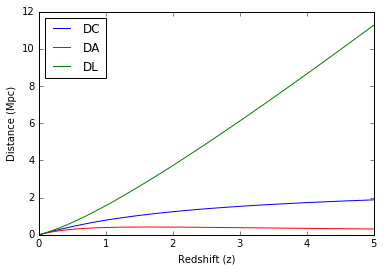

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import matplotlib as mpl
import matplotlib.lines as mlines
%matplotlib inline

OM = 0.27
OL = 0.73
OR = 8.4*10**(-5)
H_0 = 72
c = 3*10**(5) # km/s
DH =c/H_0

def Ez(z):
    Ez = (((OR*(1+z)**(4))+(OM*(1+z)**(3))+((1-OM-OL)*(1+z)**(2))+OL)**(1.0/2.0))
    return Ez

def integrand(z):
    return (1/Ez(z))

def DC(z):
    DC = DH*quad(integrand,0,z)
    return DC[0]

N = 50

z = np.linspace(0,5,N)

Dc = []
for i in range(N):
    Dc.append(DC(z[i]))

DA = []
for i in range(N):
    DA.append(DC(z[i])/(1+z[i]))

    
DL = []
for i in range(N):
    DL.append(DC(z[i]) / (1 + z[i])**(-1) )

print "(a)"
print "(b)"
      
p1 = plt.plot(z,Dc, 'b', label = 'DC')
p2 = plt.plot(z,DA, 'r', label = 'DA')
p3 = plt.plot(z,DL, 'g', label = 'DL')

plt.xlabel('Redshift (z)')
plt.ylabel('Distance (Mpc)')
plt.legend(loc = 'upper left')

plt.show()

(c)


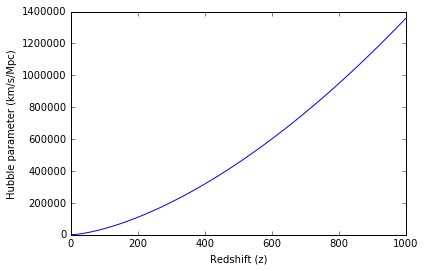

In [18]:
z = np.linspace(0,1000,1000)

print "(c)"

plt.plot(z ,Ez(z)*H_0)
plt.xlabel('Redshift (z)')
plt.ylabel('Hubble parameter (km/s/Mpc)')

plt.show()